# Basis of OpenCV

OpenCV is one of most powerful computer vision library. Containing many functions, OpenCV became an imperative skill for everyone who wants to lead with the computer vision tasks.

As everything in this life, you must a start point to reach your goals and limits. Here is the start point to the basis of OpenCV.

Covered Basic Skills
- Image read
- Image visualization.
- Image resize
- Image rotate
- Image smooth
- Image draw

## Importing libraries

In [1]:
import imutils
import cv2
import matplotlib.pyplot as plt

**Image load**

The first of all steps, load the image and extract some important informations, as width, height and depth.

In [2]:
image = cv2.imread("images/gil.jpg") # to laod the image
(h, w, d) = image.shape # to grab the size informations
print("width={}, height={}, depth={}".format(w, h, d)) # to print the image informations

width=752, height=423, depth=3


**Displaying the image**

OpenCV offers to us a function, it's called imshow(). By a preference question, in this notebook I'll consider the matplotlib library to display the images.

In [3]:
# Displaying the image with openCV
cv2.imshow("Image", image) # to showthe image
cv2.waitKey(0) # with this, we press any key on our keyboard to close the image display

122

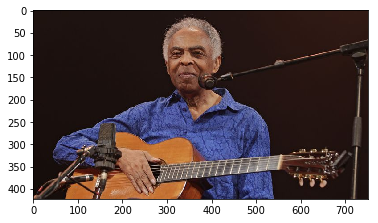

In [4]:
# Displaying using Python
# There's an inconenient when working with openCV and wanting to display with python
# OpenCV is configured as BGR and Python RGB.
# To display any image from OpenCV in Pythons, we must to use the openCV function 
# cv2.cvtColor(image, cv2.COLOR_BGR2RGB), it converts the BGR into RGB

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

**Acessing the RGB prixel for a specific coordinate**

In [5]:
(B, G, R) = image[100, 50] # to grab the required information
print("R={}, G={}, B={}".format(R, G, B))

R=28, G=17, B=15


**Extracting the Region of Interest (ROI)**

Know how to extract the ROI is a fundamental skill when you're leading with CV, specially for the object recgnitions.

Here, the input image starting at x=289,y=14 at ending at x=428,y=186

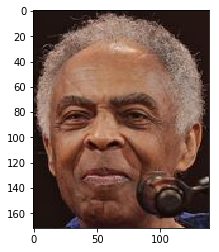

In [6]:
roi = image[14:186, 289:428] # slicing the roi from the image
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))

**Resizing Image**

One of most important step for CV. Resize images require attention, due to many reasons. When resizing images, some main characteristics of the image will be changed. It can implicate in loss of information or image distortion.

The concept of image ratio is very important to know, resize an image respecting the ratio can be a good choice or not, it’s depend on your task and the model that will be considered. Let’s put hands-on, in this way we can visualize the different way to resize an image.

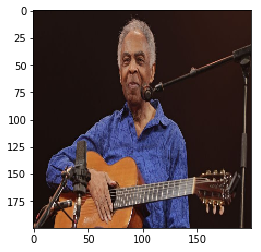

In [7]:
# resize the image to 200x200px, ignoring aspect ratio

resized = cv2.resize(image, (200, 200)) # function to resise
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))

As we can note, the image was resized, but also distorced.

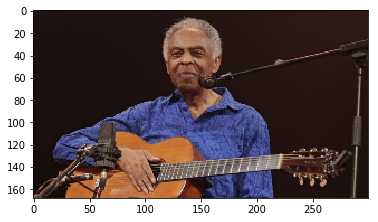

In [8]:
# Risizing the image for fixed width and aspect ratio (also for the width)
# to be 300px but compute the new height based on the aspect ratio
r = 300.0 / w # the ratio
dim = (300, int(h * r))# preserving the width and change the height
resized = cv2.resize(image, dim) # resizing into the new shape
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))

Here, the resized image shows a better quality.

In the last step, we've calculated the ratio by hand. There's a directly way to perform it. Using the library imutils, this precedes is automated.

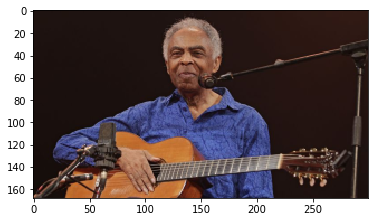

In [9]:
# resizing with imutils
resized = imutils.resize(image, width=300)
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))

**Rotating Images**

Rotation is another important skill. If you're handing-on with Open CV, you must define the center of $x$ and $y$ coordinates. Libraries as imutils, these definitions are not required. Let's rotate the image 45 degree clockwise.

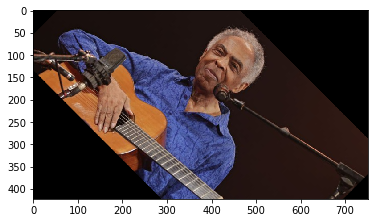

In [10]:
# OpenCV
center = (w // 2, h // 2) # getting the center of x and y
M = cv2.getRotationMatrix2D(center, -45, 1.0) # rotating the matrix 45 degree
rotated = cv2.warpAffine(image, M, (w, h)) # applying the roteted matrix in the image
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)) # displaying

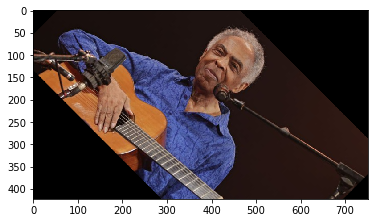

In [11]:
# With imutils, just few lines of code
rotated = imutils.rotate(image, -45) # To rotate
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)) # displaying

As we can see, the image is cropped, there's a way to avoid it, if required.

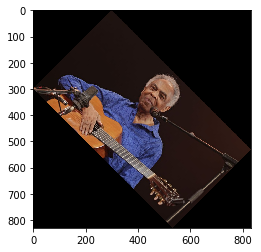

In [12]:
# Without cropping the image
rotated = imutils.rotate_bound(image, 45) # rotate_bound avoids to cropp the image
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))

**Smoothing an Image**

In the stage of image preprocess, we must smooth an image. It means, avoid the noise, and in this way we facilitate  the learning process for our algorithm. A good strategy is to blur the image. With OpenCV we can do that with GaussianBlur.

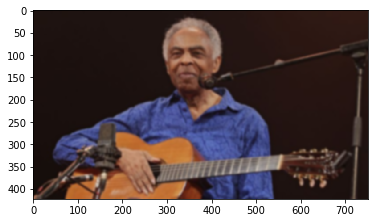

In [13]:
# apply a Gaussian blur with a 11x11 kernel to the image to smooth it,
# useful when reducing high frequency noise
blurred = cv2.GaussianBlur(image, (11, 11), 0) # (11,11) is the kernel size.
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))

**Drawing on an image**

Drawing on an image is other important skill. For example, when we hands-on with face recognition, we must draw the rectangle of the region of interest. We are going to see some techniques to draw on an image.

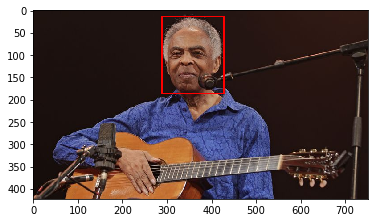

In [14]:
# drawing a red rectangle (ROI)
output = image.copy() # to copy the original imager
cv2.rectangle(output, (289, 14), (428, 186), (0, 0, 255), 2) # To draw the rectangle that corresponds to the ROI
#(320,60) the start point for y and x. (420, 160) the end point of y and x. (0, 0, 255) the color and 2 the pixelx for the line
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

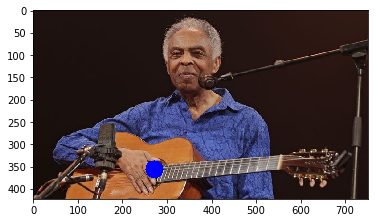

In [15]:
# drawing a blue circle on the image centered at x=272,y=356
output = image.copy()
cv2.circle(output, (272, 356), 20, (255, 0, 0), -1)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

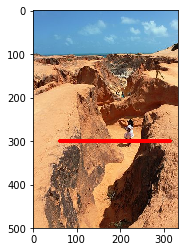

In [16]:
# Building a bridge between two cliffs
# drawing a thick red line from x=60,y=300 to x=317,y=300
img = cv2.imread("falesia.jpg") # Loading a new image
cv2.line(img, (60, 300), (317, 300), (0, 0, 255), 5) # defining parameters and drawing the line (or bridge)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # displaying

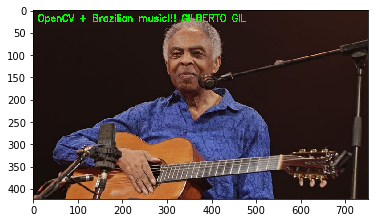

In [17]:
# draw green text on the image
output = image.copy()
text = "OpenCV + Brazilian music!!! GILBERTO GIL"
cv2.putText(output, text, (10, 25),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.7, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))